In [6]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures


In [10]:
df = pd.read_csv("./data/smoking.csv")

df.info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [3]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [4]:
# Renaming the columns for easier accessibility

new_column_names = {
    "ID": "id",
    "age": "age",
    "height(cm)": "height",
    "weight(kg)": "weight",
    "waist(cm)": "waist",
    "eyesight(left)": "eyesight_left",
    "eyesight(right)": "eyesight_right",
    "hearing(left)": "hearing_left",
    "hearing(right)": "hearing_right",
    "systolic": "systolic",
    "relaxation": "relaxation",
    "fasting blood sugar": "fasting_blood_sugar",
    "Cholesterol": "cholesterol",
    "triglyceride": "triglyceride",
    "HDL": "hdl",
    "LDL": "ldl",
    "hemoglobin": "hemoglobin",
    "Urine protein": "urine_protein",
    "serum creatinine": "serum_creatinine",
    "AST": "ast",
    "ALT": "alt",
    "Gtp": "gtp",
    "dental caries": "dental_caries",
    "smoking": "smoker_status"
}

df.rename(columns = new_column_names, inplace = True)



In [4]:
# Checking for null values

missing_values_train = df.isnull().sum()
print("Missing values for each column in train dataset:\n", missing_values_train, "\n\n")

missing_values_test = df.isnull().sum()
print("Missing values for each column in test dataset:\n", missing_values_test)

Missing values for each column in train dataset:
 id                     0
gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoker_status          0
dtype: int64 


Missing values for each column in test dataset:
 id                     0
gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_le

Correlation heatmap of continuous variables:


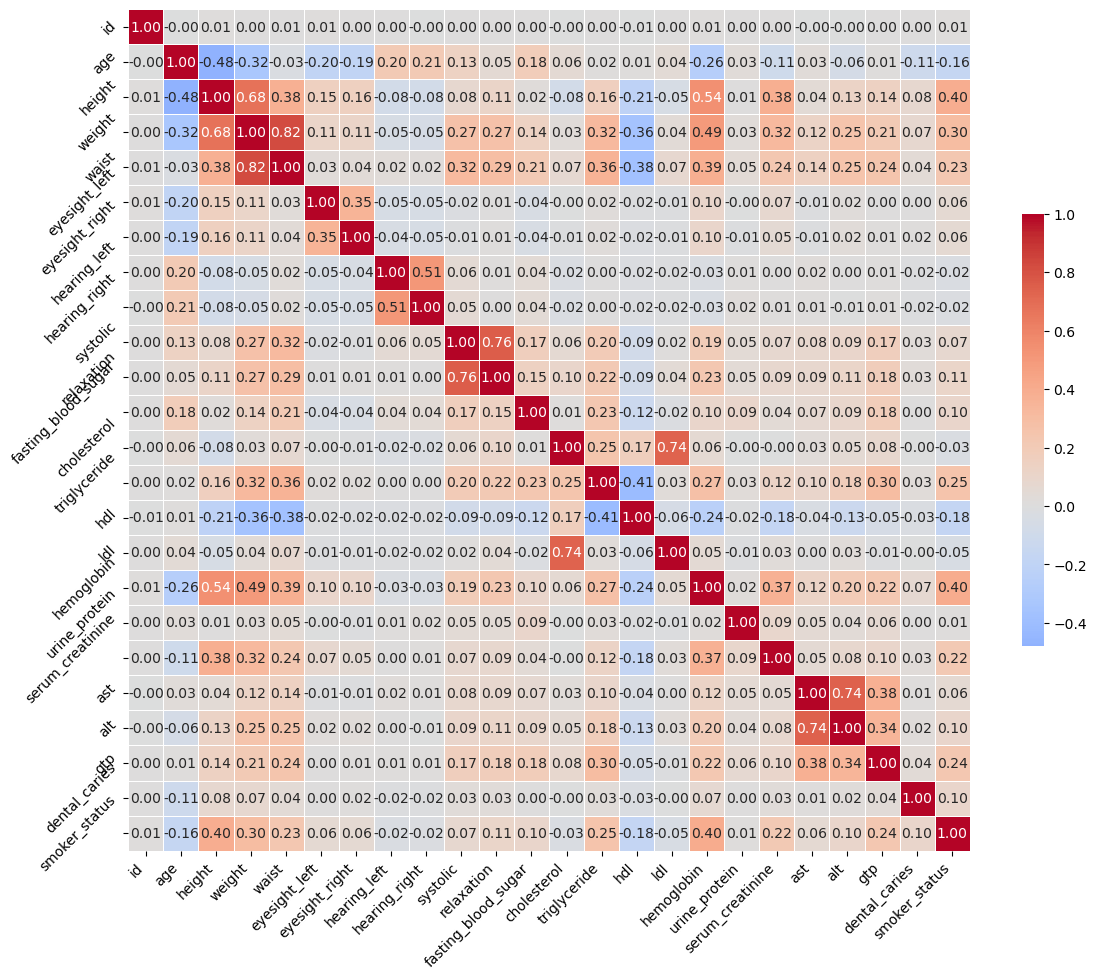

In [6]:
# Correlation analysis

correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

print("Correlation heatmap of continuous variables:")
plt.show()

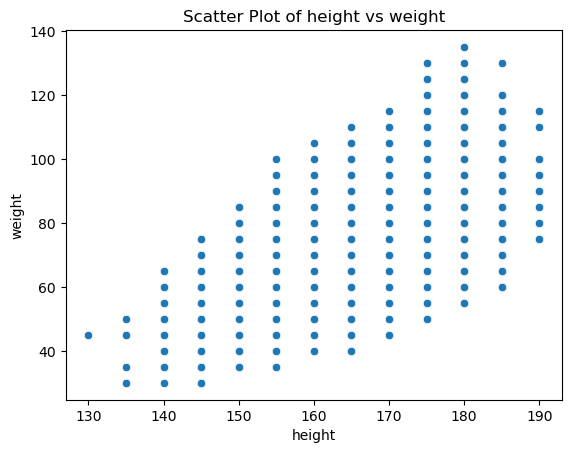

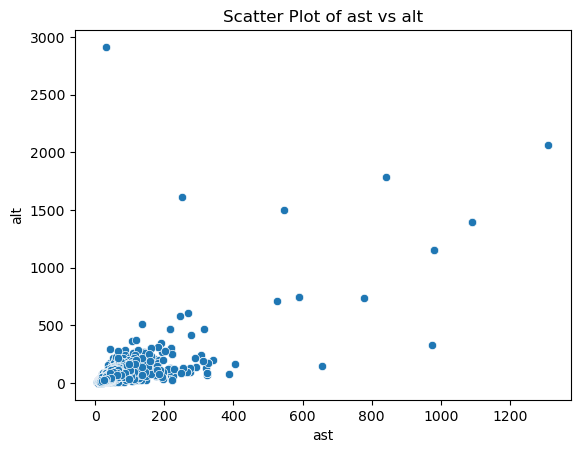

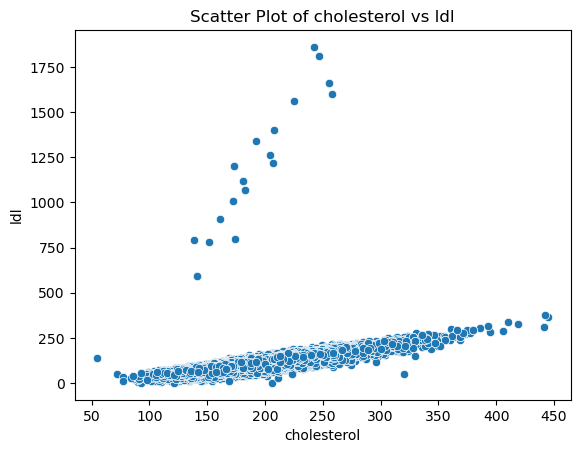

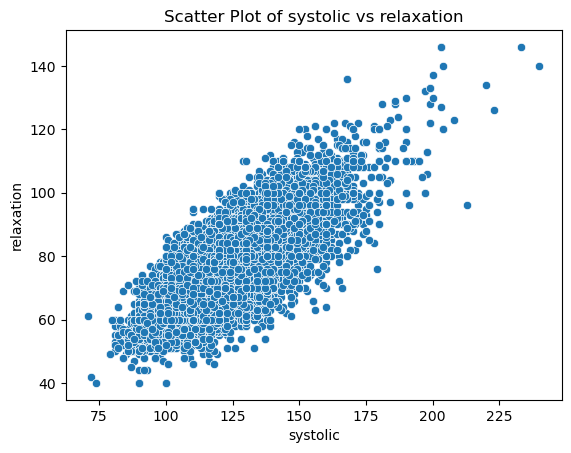

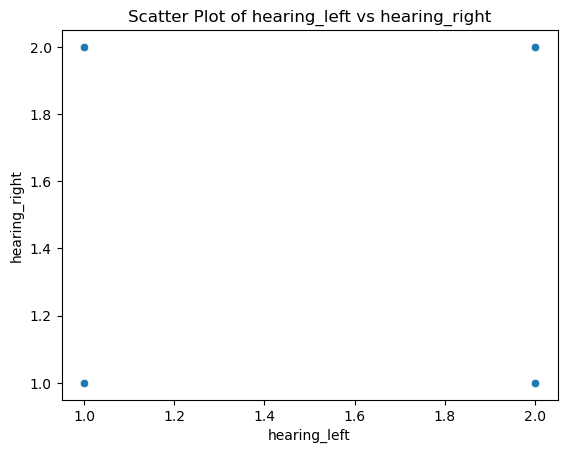

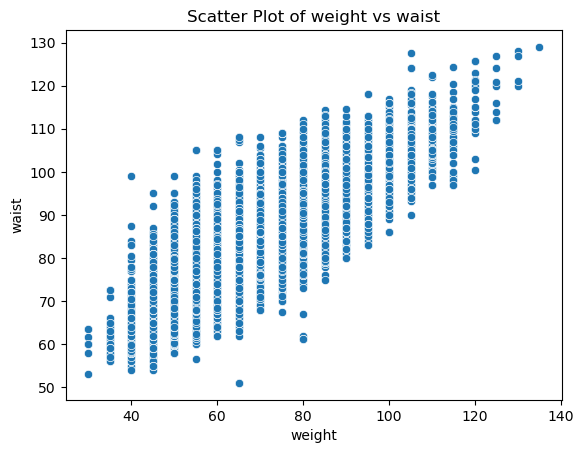

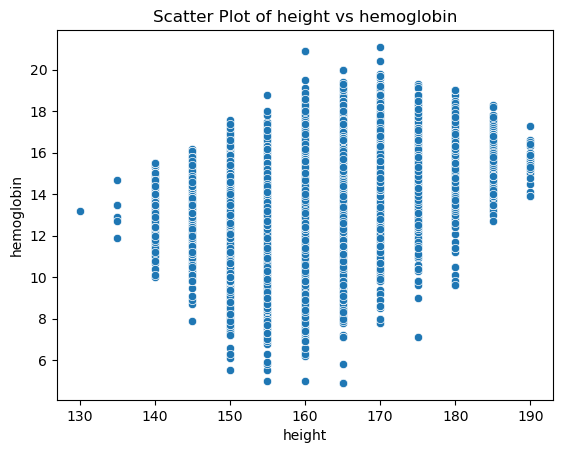

In [7]:
# Scatter plot analysis of columns with high positive (> 0.5) and negative (< -0.5) correlations.

import seaborn as sns
import matplotlib.pyplot as plt

plotted_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            plotted_pairs.add((col1, col2))

for (col1, col2) in plotted_pairs:
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [5]:
y_train = df[['id', 'smoker_status']].copy()

x_train = df.drop(['id', 'smoker_status'], axis=1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height               55692 non-null  int64  
 3   weight               55692 non-null  int64  
 4   waist                55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Function to calculate the IQR outlier cutoff
def calculate_iqr_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply the function to each feature in the dataset
outliers_indices = []

for feature in x_train.columns:
    if x_train[feature].dtype in ['float64', 'int64']:  # Only apply to numeric columns
        lower_bound, upper_bound = calculate_iqr_outliers(x_train, feature)
        feature_outliers = x_train[(x_train[feature] < lower_bound) | (x_train[feature] > upper_bound)].index
        outliers_indices.extend(feature_outliers)

# Determine which rows have outliers in multiple columns
from collections import Counter
outlier_counts = Counter(outliers_indices)
multiple_outliers = [k for k, v in outlier_counts.items() if v > 1]

x_train = x_train.drop(multiple_outliers)
y_train = y_train.drop(multiple_outliers)

print(x_train.shape)

(44360, 25)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

x_train['bmi'] = x_train['weight'] / ((x_train['height'] / 100) ** 2)
x_train['waist_to_height_ratio'] = x_train['waist'] / x_train['height']
x_train['bp_index'] = x_train['systolic'] / x_train['relaxation']

x_train['age_weight_interaction'] = x_train['age'] * x_train['weight']

# Polynomial Features for continuous variables
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train[['height', 'weight', 'waist']])
poly_feature_names = poly.get_feature_names_out(['height', 'weight', 'waist'])
for i, name in enumerate(poly_feature_names):
    x_train[name] = poly_features[:, i]

# Binning Age
x_train['age_group'] = pd.cut(x_train['age'], bins=[0, 18, 35, 65, 100], labels=['child', 'young_adult', 'adult', 'senior'])

# Log Transformation for skewed features
skewed_features = ['fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'ast', 'alt', 'gtp']
for feature in skewed_features:
    x_train[f'log_{feature}'] = np.log1p(x_train[feature])


# Encoding Categorical Variables
x_train = pd.get_dummies(x_train, columns=['gender', 'oral', 'tartar', 'age_group'])

# Health Risk Index
x_train['health_risk_index'] = (x_train['log_triglyceride'] + x_train['log_cholesterol'] + x_train['log_ast'] + x_train['log_alt'] + x_train['log_gtp']) / 5

# Metabolic Index
x_train['metabolic_index'] = (x_train['waist'] + x_train['log_fasting_blood_sugar'] + (x_train['systolic'] + x_train['relaxation']) / 2) / 3

# Interaction between waist size and gender
x_train['waist_gender_interaction'] = x_train['waist'] * x_train['gender_M']

# Interaction between health indexes and age
x_train['age_health_risk_interaction'] = x_train['age'] * x_train['health_risk_index']

# Derived Categorical Feature: Binning Health Risk Index into Risk Categories
x_train['health_risk_category'] = pd.cut(x_train['health_risk_index'], bins=3, labels=['low', 'medium', 'high'])

# One-hot encode the newly created 'health_risk_category'
x_train = pd.get_dummies(x_train, columns=['health_risk_category'])

In [22]:
from sklearn.preprocessing import MinMaxScaler
float_cols = df.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(x_train[float_cols])

# Transform both the training and testing data
x_train[float_cols] = scaler.transform(x_train[float_cols])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train['smoker_status'], random_state = 42, test_size = 0.15)
X_train.shape


(37706, 56)

In [23]:
rf = RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800)


rf.fit(X_train, Y_train)
predict = rf.predict(X_test)

predict_prob = rf.predict_proba(X_test)

In [25]:


accuracy = accuracy_score(Y_test, predict)
precision = precision_score(Y_test, predict)
recall = recall_score(Y_test, predict)
f1 = f1_score(Y_test, predict)
auc_roc = roc_auc_score(Y_test, predict_prob[:, 1])


print(accuracy)
print(precision)
print(recall)
print(f1)
print(f'AUC-ROC Score: {auc_roc}')

0.84385332131049
0.7710181664554289
0.7859603789836348
0.7784175730432928
AUC-ROC Score: 0.9220767988242059


In [14]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Performance Metrics for {model.__class__.__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}\n")
X_train.shape

(37706, 56)

In [10]:
# Experiment with multiple models:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize the model and GridSearchCV
log_reg = LogisticRegression(max_iter=10000)
grid_search_log_reg = GridSearchCV(log_reg, log_reg_params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_log_reg.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_search_log_reg.best_score_)

evaluate_model(grid_search_log_reg.best_estimator_, X_test, Y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8454484608347931
Performance Metrics for LogisticRegression:
Accuracy: 0.7660
Precision: 0.6631
Recall: 0.6697
F1 Score: 0.6664
ROC AUC Score: 0.8454



In [21]:
!pip install xgboost

In [45]:
from xgboost import XGBClassifier

# Define the parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Initialize the model and GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(xgb, xgb_params, cv=3, scoring='roc_auc', verbose=1)

# Fit the grid search
grid_search_xgb.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)



Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}
Best score for XGBoost: 0.8890108439629407
Performance Metrics for XGBClassifier:
Accuracy: 0.8372
Precision: 0.7685
Recall: 0.7636
F1 Score: 0.7660
ROC AUC Score: 0.9046



In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the model and GridSearchCV
svm = SVC(probability=True)
grid_search_svm = GridSearchCV(svm, svm_params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_svm.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

evaluate_model(grid_search_svm.best_estimator_, X_test, Y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM: 0.8333517143159411


NameError: name 'evaluate_model' is not defined

In [13]:
evaluate_model(grid_search_svm.best_estimator_, X_test, Y_test)

Performance Metrics for SVC:
Accuracy: 0.7571
Precision: 0.6497
Recall: 0.6598
F1 Score: 0.6547
ROC AUC Score: 0.8369



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the model and GridSearchCV
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, knn_params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_knn.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

evaluate_model(grid_search_knn.best_estimator_, X_test, Y_test)



Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
Best score for KNN: 0.8410164557127294


NameError: name 'evaluate_model' is not defined

In [15]:
evaluate_model(grid_search_knn.best_estimator_, X_test, Y_test)

Performance Metrics for KNeighborsClassifier:
Accuracy: 0.7913
Precision: 0.7161
Recall: 0.6658
F1 Score: 0.6900
ROC AUC Score: 0.8823



In [24]:
y_pred = rf.predict(X_test)

# Identify misclassified instances
misclassified = np.where(Y_test != y_pred)[0]

# Analysis of misclassified instances
misclassified_data = X_test.iloc[misclassified]
misclassified_data['true_status'] = Y_test.iloc[misclassified]
misclassified_data['predicted_status'] = y_pred[misclassified]

# Print initial findings
print(f"Total number of misclassified instances: {len(misclassified)}")
print("Initial Misclassified instances analysis:")
print(misclassified_data.describe())

Total number of misclassified instances: 1030
Initial Misclassified instances analysis:
               age       height       weight        waist  eyesight_left  \
count  1030.000000  1030.000000  1030.000000  1030.000000    1030.000000   
mean     40.650485   169.266990    69.616505    83.476408       1.059417   
std      12.122399     7.079417    11.033720     7.866920       0.495346   
min      20.000000   145.000000    45.000000    63.000000       0.200000   
25%      30.000000   165.000000    60.000000    78.000000       0.900000   
50%      40.000000   170.000000    70.000000    83.000000       1.000000   
75%      50.000000   175.000000    75.000000    88.150000       1.200000   
max      80.000000   185.000000   100.000000   114.600000       9.900000   

       eyesight_right  hearing_left  hearing_right     systolic   relaxation  \
count     1030.000000   1030.000000    1030.000000  1030.000000  1030.000000   
mean         1.057961      1.004854       1.010680   120.775728    

/var/folders/qk/c33ml16s1f7gkjcf2dvq30ww0000gp/T/ipykernel_1194/2933136120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_data['true_status'] = Y_test.iloc[misclassified]
/var/folders/qk/c33ml16s1f7gkjcf2dvq30ww0000gp/T/ipykernel_1194/2933136120.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_data['predicted_status'] = y_pred[misclassified]


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming misclassified_data contains all features for misclassified instances and is already defined

# Dropping non-numeric columns for clustering (if any)
misclassified_data_numeric = misclassified_data.select_dtypes(include=[np.number])

# Scaling the data
scaler = StandardScaler()
misclassified_scaled = scaler.fit_transform(misclassified_data_numeric)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
misclassified_clusters = kmeans.fit_predict(misclassified_scaled)

# Adding cluster labels to the misclassified data
misclassified_data['cluster'] = misclassified_clusters

# Analyzing the clusters
# Checking the size of each cluster
print("Cluster distribution:\n", misclassified_data['cluster'].value_counts())

# Examining mean feature values by cluster
cluster_means = misclassified_data.groupby('cluster').mean()
print("\nCluster means:\n", cluster_means)

# Comparing clusters' mean feature values could reveal specific patterns or feature thresholds leading to misclassification.


Cluster distribution:
 cluster
1    392
0    357
2    281
Name: count, dtype: int64

Cluster means:
                age      height     weight      waist  eyesight_left  \
cluster                                                               
0        32.913165  171.862745  67.058824  79.485154       1.139216   
1        39.821429  171.760204  79.081633  90.325765       1.096173   
2        51.637011  162.491103  59.661922  78.992171       0.906762   

         eyesight_right  hearing_left  hearing_right    systolic  relaxation  \
cluster                                                                        
0              1.143697      1.005602       1.000000  115.462185   71.971989   
1              1.076531      1.000000       1.010204  125.119898   79.834184   
2              0.923132      1.010676       1.024911  121.466192   75.580071   

         ...  age_group_senior  health_risk_index  metabolic_index  \
cluster  ...                                                         
0 

/var/folders/qk/c33ml16s1f7gkjcf2dvq30ww0000gp/T/ipykernel_1194/2324637358.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_data['cluster'] = misclassified_clusters


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure the 'cluster' column is included in your misclassified_data dataframe
# 'misclassified_data' should have been prepared in the previous steps

def train_and_evaluate_by_cluster(misclassified_data, cluster_label):
    """
    Trains a RandomForest model on the data corresponding to a given cluster within misclassified instances and evaluates its performance.

    Parameters:
    - misclassified_data: DataFrame, containing features, true labels, predicted labels, and cluster assignments of misclassified instances
    - cluster_label: int, the label of the cluster to train and evaluate the model on
    """
    # Filtering data for the current cluster
    cluster_indices = misclassified_data['cluster'] == cluster_label
    X_cluster = misclassified_data[cluster_indices].drop(['cluster', 'true_status', 'predicted_status'], axis=1)
    y_cluster = misclassified_data.loc[cluster_indices, 'true_status']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=42)

    # Training the RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluating the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Cluster {cluster_label} - Model Accuracy: {accuracy:.4f}")

    # Displaying feature importances
    feature_importances = model.feature_importances_
    features = X_cluster.columns
    importance_dict = {feature: importance for feature, importance in zip(features, feature_importances)}
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

    print("Top 5 Feature Importances:")
    for feature, importance in sorted_importance[:5]:
        print(f"{feature}: {importance:.4f}")

# Assuming there are 3 clusters (0, 1, 2)
for cluster_label in range(3):
    train_and_evaluate_by_cluster(misclassified_data, cluster_label)


Cluster 0 - Model Accuracy: 0.8426
Top 5 Feature Importances:
gtp: 0.0888
log_gtp: 0.0626
log_triglyceride: 0.0522
triglyceride: 0.0439
health_risk_index: 0.0374
Cluster 1 - Model Accuracy: 0.8136
Top 5 Feature Importances:
gtp: 0.0879
log_gtp: 0.0667
health_risk_index: 0.0429
age_weight_interaction: 0.0337
log_triglyceride: 0.0335
Cluster 2 - Model Accuracy: 0.8471
Top 5 Feature Importances:
gender_M: 0.0661
waist_gender_interaction: 0.0594
gtp: 0.0579
log_gtp: 0.0436
hemoglobin: 0.0429


In [ ]:
# base_models = [
#     ('rf', RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800)),
#     ('dt', LGBMClassifier(min_child_weight=3,reg_alpha=1.0,subsample=1.0,learning_rate= 0.2,
#                     n_jobs=-1,colsample_bytree= 0.9,objective = 'binary')),
#     ('svc', SVC(probability=True))
# ]

# # base_models = [
# #     ('rf', DecisionTreeClassifier()),
# #     ('dt', SVC(probability=True)),
# #     ('svc', RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800))
# # ]

# # Meta-model
# meta_model = CatBoostClassifier(n_estimators=1000,learning_rate= 0.2,depth= 5)

# # Stacking ensemble
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# # Train the stacking model
# stacking_model.fit(X_train, Y_train)

# # Evaluate the model
# y_pred = stacking_model.predict(X_test)
# accuracy = accuracy_score(Y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.ensemble import AdaBoostClassifier

# # Define base models
# base_models = [
#     ('rf', RandomForestClassifier(bootstrap=True, max_depth=40, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=800)),
#     ('gb', CatBoostClassifier(n_estimators=1000,learning_rate= 0.2,depth= 5))
# ]

# # Define meta-model
# meta_model = LogisticRegression()

# # Create the stacking model
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# # Train the stacking model
# stacking_model.fit(X_train, Y_train)

# # Evaluate the model
# stacking_accuracy = stacking_model.score(X_test, Y_test)
# print(f'Stacking Model Accuracy: {stacking_accuracy}')

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = stacking_model.predict(X_test)
# y_pred_proba = stacking_model.predict_proba(X_test)[:,1]  # Probability estimates for the positive class

# # Calculate precision, recall, and f1-score
# precision = precision_score(Y_test, y_pred)
# recall = recall_score(Y_test, y_pred)
# f1 = f1_score(Y_test, y_pred)
# accuracy = accuracy_score(Y_test, predict)

# # Calculate ROC AUC score
# roc_auc = roc_auc_score(Y_test, y_pred_proba)


# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')
# print(f'ROC AUC Score: {roc_auc}')
# print(f'Accu: {accuracy}')

# # Plot the ROC curve
# fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()


In [18]:
def random_nan(df, frac=0.3):
    total_cells = np.prod(df.shape)
    num_cells_to_replace = int(total_cells * frac)
    
    rows = np.random.randint(0, df.shape[0], size=num_cells_to_replace)
    cols = np.random.randint(0, df.shape[1], size=num_cells_to_replace)
    
    for row, col in zip(rows, cols):
        df.iat[row, col] = np.nan
    
    return df

data = pd.read_csv("./data/trainv2.csv")
data = random_nan(data.head())

data.head()

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoker_status
0,M,30.0,NaN,70.0,NaN,NaN,1.5,NaN,1.0,126.0,...,15.9,1.0,0.8,26.0,24.0,NaN,Y,0.0,Y,0.0
1,F,NaN,160.0,70.0,NaN,NaN,0.5,1.0,1.0,NaN,...,6.4,1.0,0.6,NaN,14.0,16.0,Y,0.0,NaN,NaN
2,M,55.0,170.0,NaN,NaN,1.0,0.9,1.0,NaN,110.0,...,NaN,1.0,0.9,34.0,36.0,190.0,Y,0.0,N,1.0
3,M,30.0,165.0,70.0,87.0,1.5,1.2,NaN,1.0,102.0,...,17.8,1.0,1.1,21.0,26.0,NaN,NaN,0.0,Y,NaN
4,M,NaN,NaN,70.0,87.0,0.7,NaN,NaN,1.0,112.0,...,15.9,1.0,NaN,30.0,NaN,70.0,Y,NaN,NaN,1.0
